## ML Lab 3
### Neural Networks

In the following exercise class we explore how to design and train neural networks in various ways.

#### Prerequisites:

In order to follow the exercises you need to:
1. Activate your conda environment from last week via: `source activate <env-name>` 
2. Install tensorflow (https://www.tensorflow.org) via: `pip install tensorflow` (CPU-only)
3. Install keras (provides high level wrapper for tensorflow) (https://keras.io) via: `pip install keras`

## Exercise 1: Create a 2 layer network that acts as an XOR gate using numpy.

XOR is a fundamental logic gate that outputs a one whenever there is an odd parity of ones in its input and zero otherwise. For two inputs this can be thought of as an exclusive or operation and the associated boolean function is fully characterized by the following truth table.

| X | Y | XOR(X,Y) |
|---|---|----------|
| 0 | 0 |    0     |
| 0 | 1 |    1     |
| 1 | 0 |    1     |
| 1 | 1 |    0     |

The function of an XOR gate can also be understood as a classification problem on $v \in \{0,1\}^2$ and we can think about designing a classifier acting as an XOR gate. It turns out that this problem is not solvable by any single layer perceptron (https://en.wikipedia.org/wiki/Perceptron) because the set of points $\{(0,0), (0,1), (1,0), (1,1)\}$ is not linearly seperable.

**Design a two layer perceptron using basic numpy matrix operations that implements an XOR Gate on two inputs. Think about the flow of information and accordingly set the weight values by hand.**

### Data

In [1]:
import numpy as np

def generate_xor_data():
    X = [(i,j) for i in [0,1] for j in [0,1]]
    y = [int(np.logical_xor(x[0], x[1])) for x in X]
    return X, y
    
print(generate_xor_data())

([(0, 0), (0, 1), (1, 0), (1, 1)], [0, 1, 1, 0])


### Hints
A single layer in a multilayer perceptron can be described by the equation $y = f(\vec{b} + W\vec{x})$ with $f$ the logistic function, a smooth and differentiable version of the step function, and defined as $f(z) = \frac{1}{1+e^{-z}}$. $\vec{b}$ is the so called bias, a constant offset vector and $W$ is the weight matrix. However, since we set the weights by hand feel free to use hard thresholding instead of using the logistic function. Write down the equation for a two layer MLP and implement it with numpy. For documentation see https://docs.scipy.org/doc/numpy-1.13.0/reference/ 

| X | Y | AND(NOT X, Y) | AND(X,NOT Y) | OR[AND(NOT X, Y), AND(X, NOT Y)]| XOR(X,Y) |
|---|---|---------------|--------------|---------------------------------|----------|
| 0 | 0 |    0          |      0       |                 0               |    0     |
| 0 | 1 |    1          |      0       |                 1               |    1     |
| 1 | 0 |    0          |      1       |                 1               |    1     |
| 1 | 1 |    0          |      0       |                 0               |    0     |

Implement XOR as a combination of 2 AND Gates and 1 OR gate where each neuron in the network acts as one of these gates.

In [2]:
def solution1(input_):
    """
    Implement your solution here.
    """
    input_ = np.asarray(input_)
    # layer1 maps inputs to two outputs
    # set layer1 weights
    W1 = np.array(((1, -1), (-1, 1)))
    # calculate layer1 nodes
    layer1 = W1.dot(input_) > 0.5
    # layer2 weights
    W22 = np.array((1, 1))
    # layer2 output
    layer21 = W22.dot(layer1) > 0.5
    return layer21
    

In [3]:
def test_solution():
    inputs, outputs = generate_xor_data()
    test_outputs = [solution1(input_) for input_ in inputs]
    print(test_outputs, outputs)
    assert np.array_equal(test_outputs, outputs)

In [4]:
test_solution()

[False, True, True, False] [0, 1, 1, 0]


## Exercise 2: Use Keras to design, train and evaluate a neural network that can classify points on a 2D plane.

### Data generator

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

### Training data

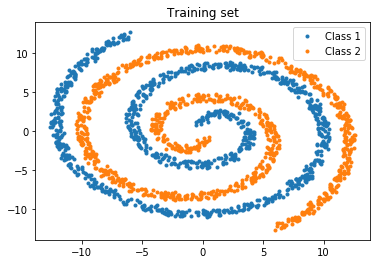

In [6]:
X_train, y_train = generate_spiral_data(1000)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

### Test data

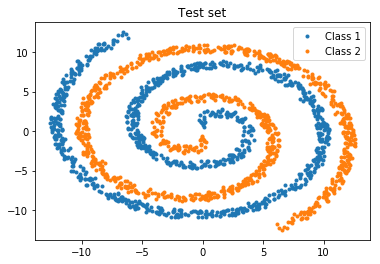

In [7]:
X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

### 2.1. Design and train your model
The current model performs badly, try to find a more advanced architecture that is able to solve the classification problem. Read the following code snippet and understand the involved functions. Vary width and depth of the network and play around with activation functions, loss functions and optimizers to achieve a better result. Read up on parameters and functions for sequential models at https://keras.io/getting-started/sequential-model-guide/.

In [8]:
from keras.models import Sequential
from keras.layers import Dense

"""
Replace the following model with yours and try to achieve better classification performance
"""
bad_model = Sequential()
bad_model.add(Dense(12, input_dim=2, activation='tanh'))
bad_model.add(Dense(1, activation='sigmoid'))

bad_model.summary()

bad_model.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
bad_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### Predict

In [9]:
bad_prediction = np.round(bad_model.predict(X_test).T[0])

### Visualize

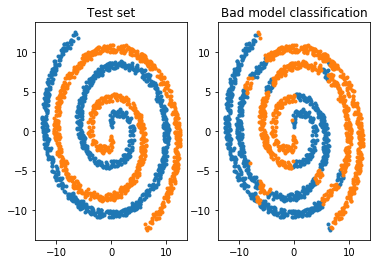

In [10]:
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Bad model classification')
plt.plot(X_test[bad_prediction==0,0], X_test[bad_prediction==0,1], '.')
plt.plot(X_test[bad_prediction==1,0], X_test[bad_prediction==1,1], '.')
plt.show()

### Good model

256
64
16
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 18,329
Trainable params: 18,329
Non-trainable params: 0
_________________________________________________________________


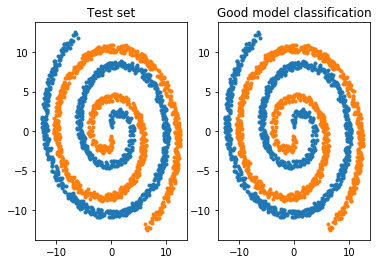

In [11]:
# my good model

good_model = Sequential()
depth = 4
for i in range(depth):
    width = 4 ** (4 - i)
    print(width)
    good_model.add(Dense(width, input_dim=2, activation='relu'))
good_model.add(Dense(1, activation='sigmoid'))

good_model.summary()

good_model.compile(loss='binary_crossentropy',
                  optimizer='Adam', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
good_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

### Predict

good_prediction = np.round(good_model.predict(X_test).T[0])

### Visualize

plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Good model classification')
plt.plot(X_test[good_prediction==0,0], X_test[good_prediction==0,1], '.')
plt.plot(X_test[good_prediction==1,0], X_test[good_prediction==1,1], '.')
plt.show()

### 2.2. Visualize the decision boundary of your model.

### Visualization

#### Performance

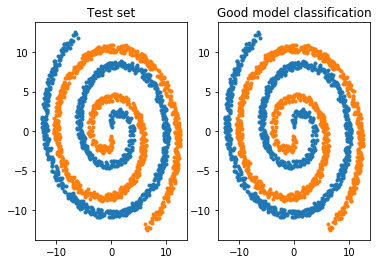

In [12]:
def plot_good_spiral_prediction(X_test, y_test, good_prediction):
    plt.subplot(1,2,1)
    plt.title('Test set')
    plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
    plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
    plt.subplot(1,2,2)
    plt.title('Good model classification')
    plt.plot(X_test[good_prediction==0,0], X_test[good_prediction==0,1], '.')
    plt.plot(X_test[good_prediction==1,0], X_test[good_prediction==1,1], '.')
    plt.show()

plot_good_spiral_prediction(X_test, y_test, good_prediction)

In [13]:
good_model

#### Decision boundary

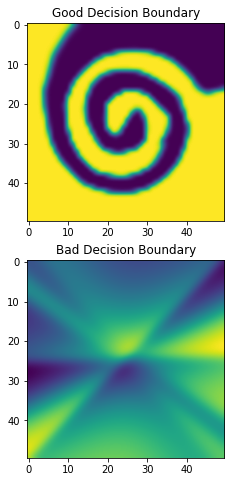

In [14]:
def plot_decision_boundaries(good_model, bad_model):
    # Generate grid:
    line = np.linspace(-15,15)
    xx, yy = np.meshgrid(line,line)
    grid = np.stack((xx,yy))

    # Reshape to fit model input size:
    grid = grid.T.reshape(-1,2)

    # Predict:
    good_prediction = good_model.predict(grid)
    bad_prediction = bad_model.predict(grid)

    # Reshape to grid for visualization:
    fig, axs = plt.subplots(2, figsize=(16, 8))
    good_prediction = good_prediction.T[0].reshape(len(line),len(line))
    axs[0].imshow(good_prediction, interpolation="bicubic")
    axs[0].set_title("Good Decision Boundary")

    bad_prediction = bad_prediction.T[0].reshape(len(line),len(line))
    axs[1].imshow(bad_prediction, interpolation="bicubic")
    axs[1].set_title("Bad Decision Boundary")

plot_decision_boundaries(good_model, bad_model)

## Design, train and test a neural network that is able to classify MNIST digits using Keras.

### Data

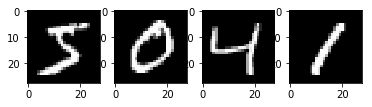

In [20]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""
Returns:
2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
"""

# Show example data
plt.subplot(1,4,1)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,2)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,3)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,4)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [22]:
def plot_mnist_predictions(cnn_model, x_test):
    y_predict = cnn_model.predict(x_test, verbose=0)
    y_predict_digits = [np.argmax(y_predict[i]) for i in range(y_predict.shape[0])]
    plt.subplot(1,4,1)
    plt.imshow(x_test[0,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,2)
    plt.imshow(x_test[1,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,3)
    plt.imshow(x_test[2,:,:,0], cmap=plt.get_cmap('gray'))
    plt.subplot(1,4,4)
    plt.imshow(x_test[3,:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

    print("CNN predictions: {0}, {1}, {2}, {3}".format(y_predict_digits[0],
                                                       y_predict_digits[1],
                                                       y_predict_digits[2],
                                                       y_predict_digits[3]))

In [23]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

"""
We need to add a channel dimension
to the image input.
"""
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2],
                          1)
x_test = x_test.reshape(x_test.shape[0],
                        x_test.shape[1],
                        x_test.shape[2],
                        1)
"""
Train the image using 32-bit floats normalized
between 0 and 1 for numerical stability.
"""
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_shape = (x_train.shape[1], x_train.shape[2], 1)

"""
Output should be a 10 dimensional one-hot vector,
not just an integer denoting the digit.
This is due to our use of softmax to "squish" network
output for classification.
"""
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 6,490
Trainable params: 6,490
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

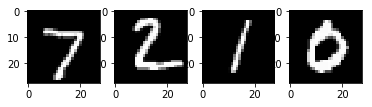

CNN predictions: 7, 2, 1, 0


In [26]:
"""
Implement your solution here.
"""

cnn_model = Sequential()
cnn_model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D())
cnn_model.add(Conv2D(16, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

cnn_model.summary()

# Train the model
cnn_model.fit(x_train, y_train, epochs=1, verbose=1)

plot_mnist_predictions(cnn_model, x_test)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
l = cnn_model.layers[0]

In [33]:
w = l.get_weights()

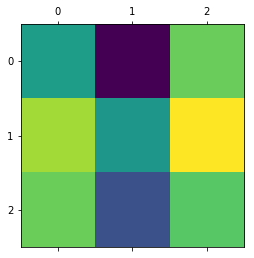

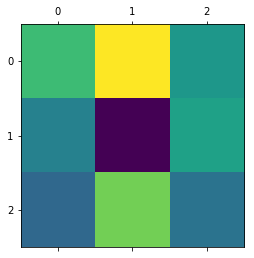

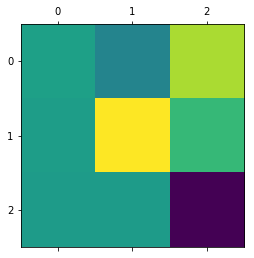

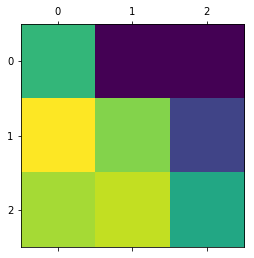

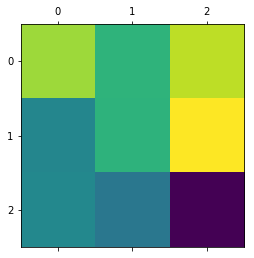

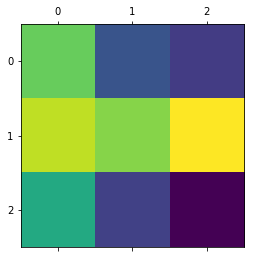

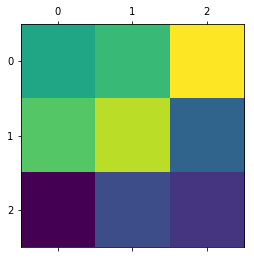

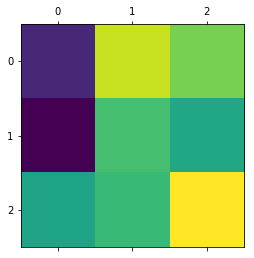

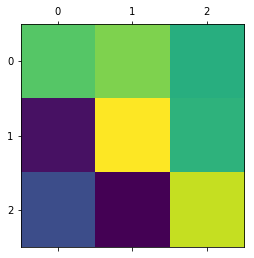

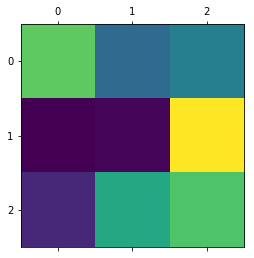

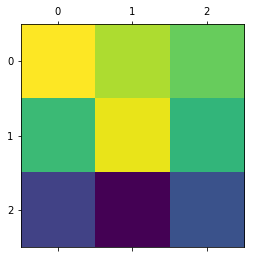

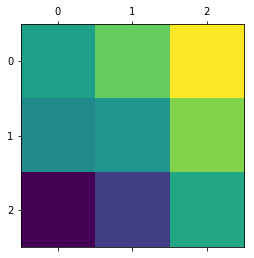

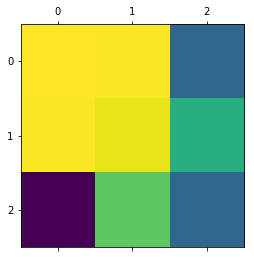

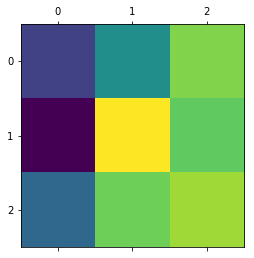

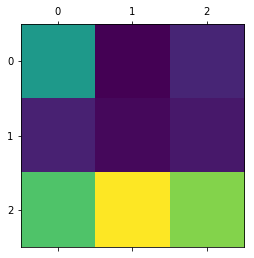

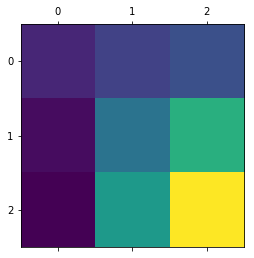

In [38]:
for ww in np.rollaxis(w[0].squeeze(), -1):
    plt.matshow(ww)

In [40]:
w[1].shape

(16,)